<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Francisca Ruiz
- Nombre de alumno 2: Valentina Zúñiga


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/vazuniga1/Laboratorios)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

## 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
!wget 'https://docs.google.com/uc?export=download&id=1Z16p9vdWa8_sS61mpQHWZ78q6izXT4uf' -O diabetes_data.csv

--2024-11-07 21:08:23--  https://docs.google.com/uc?export=download&id=1Z16p9vdWa8_sS61mpQHWZ78q6izXT4uf
Resolving docs.google.com (docs.google.com)... 74.125.137.138, 74.125.137.101, 74.125.137.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Z16p9vdWa8_sS61mpQHWZ78q6izXT4uf&export=download [following]
--2024-11-07 21:08:23--  https://drive.usercontent.google.com/download?id=1Z16p9vdWa8_sS61mpQHWZ78q6izXT4uf&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5287141 (5.0M) [application/octet-stream]
Saving to: ‘diabetes_data.csv’

diabetes_data.csv   100%[===================>]   5.04M  26.9MB/s

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [3]:
!pip install xgboost

In [4]:
# 1.
# Analisis exploratorio

df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


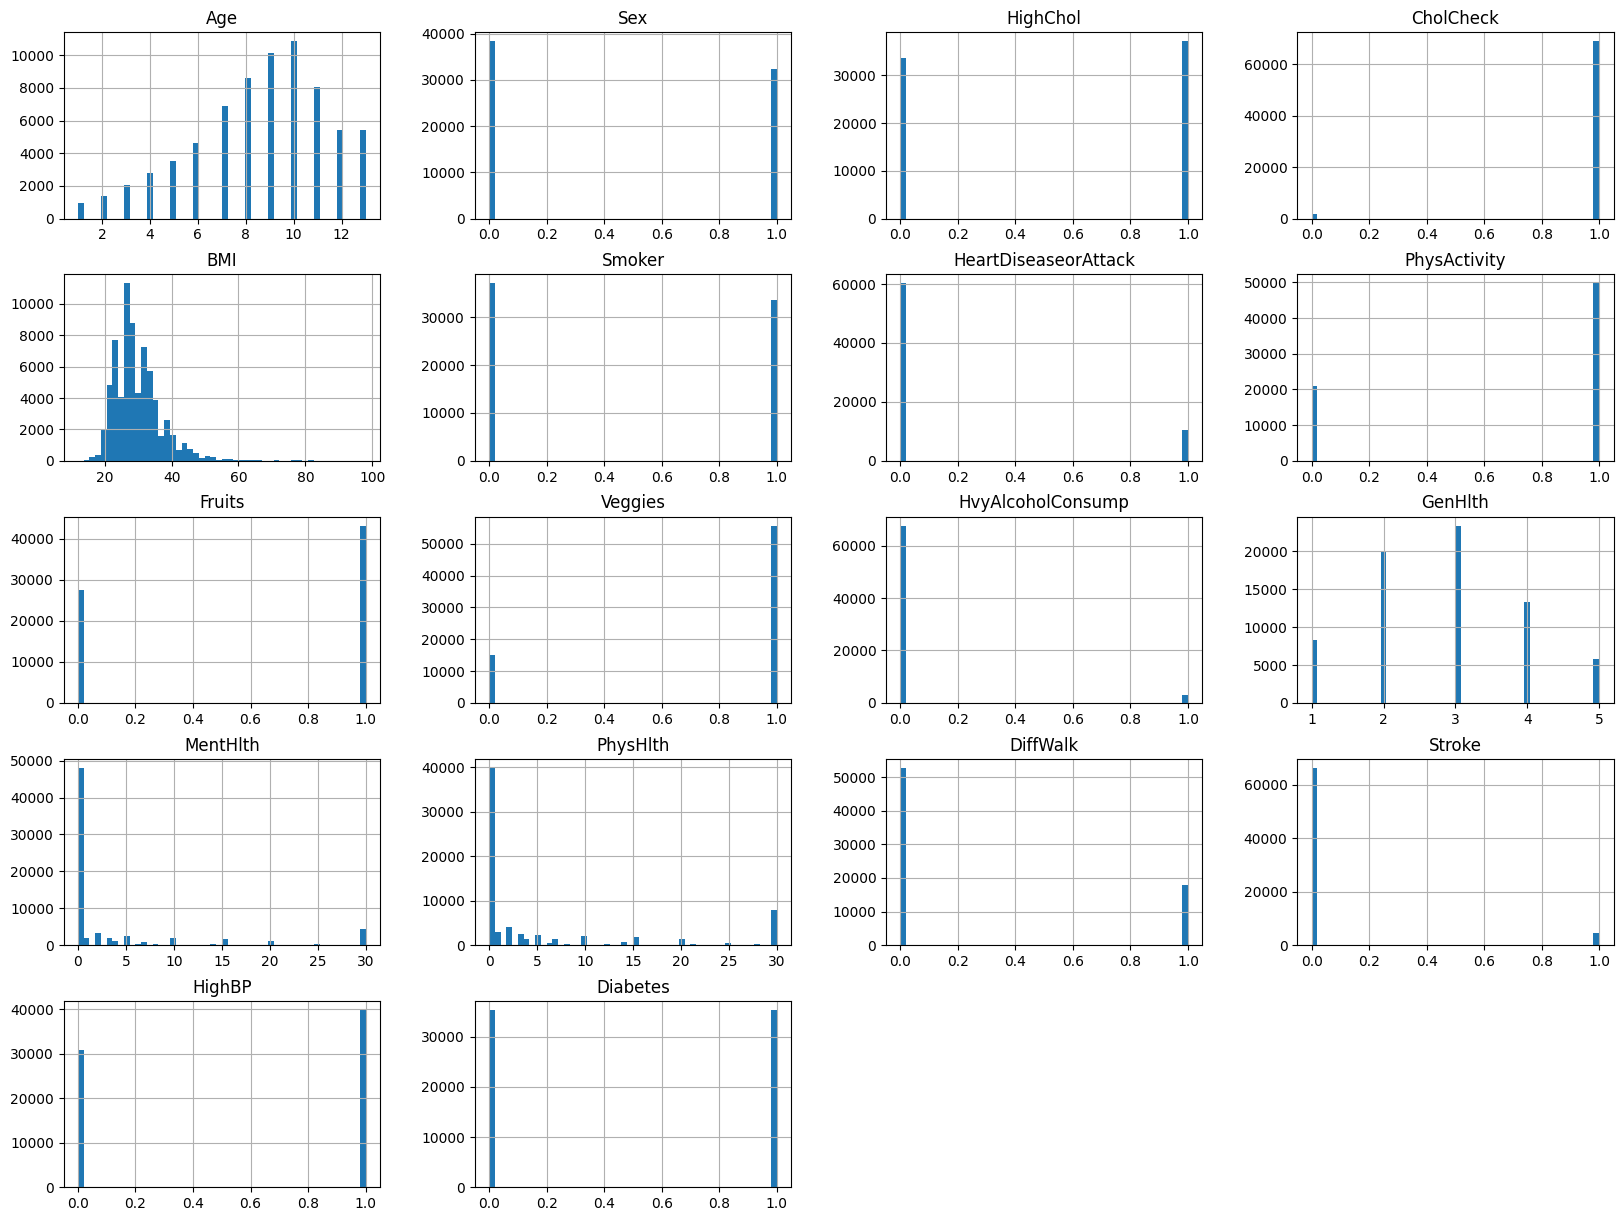

In [5]:
# Se plotea cada variable en el mismo histograma

import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

Al revisar los datos, se puede apreciar que es necesario aplicar:


*   MinMaxScaler a las variables que presentan un comportamiento similar a una distribución normal como Age, BMI, Menthlth y PhysHlth.
*   OneHotEncoder a aquellas variables que presentan una cantidad de categorias multiples como GenHlth.



In [6]:
# Se crea conjunto de train y test
from sklearn import set_config
from sklearn.model_selection import train_test_split
set_config(transform_output="pandas")

# Separamos datos
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Separamos por conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

minmax_category = ['Age', 'BMI', 'MentHlth', 'PhysHlth']
onehot_category = ['GenHlth']
passthrough_category = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', \
                        'HvyAlcoholConsump',	'DiffWalk', 'Stroke', 'HighBP']

col_transformer = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_category),
        ('onehot', OneHotEncoder(sparse_output = False), onehot_category),
        ('passthrough', 'passthrough', passthrough_category)
    ],
    verbose_feature_names_out=False
)

col_transformer.set_output(transform='pandas')

ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                 ['Age', 'BMI', 'MentHlth', 'PhysHlth']),
                                ('onehot', OneHotEncoder(sparse_output=False),
                                 ['GenHlth']),
                                ('passthrough', 'passthrough',
                                 ['Sex', 'HighChol', 'CholCheck', 'Smoker',
                                  'HeartDiseaseorAttack', 'PhysActivity',
                                  'Fruits', 'Veggies', 'HvyAlcoholConsump',
                                  'DiffWalk', 'Stroke', 'HighBP'])],
                  verbose_feature_names_out=False)

In [8]:
# Cree un pipeline donde integre el preprocesamiento y el modelo XGBoost y entrene el modelo.
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

pipeline_xgb = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier())
])

pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['Age', 'BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['GenHlth']),
                                                 ('passthrough', 'passthrough',
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'DiffWalk', 'Stroke',
                                                   '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [9]:
from sklearn.metrics import classification_report

# realizamos predicciones
y_pred = pipeline_xgb.predict(X_test)

# Vemos desempeño
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     10601
         1.0       0.73      0.79      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



2.
* ¿Es acaso un buen predictor de diabetes?

R: El modelo no es exactamente un buen predictor ya que tiene en general un accuracy de 75%, es decir, falla 1 de 4 casos, por lo que es bastante mejorable.

* ¿Qué buscan explicar las métricas utilizadas?

R: La precisión muestra el porcentaje de predicciones correctas que se realiza para cada clase, el recall entrega la capacidad que se tiene para identificar aquellos casos que son realmente positivos (diabetes) y F1-Score entrega el balance existente entre precision y recall, siendo una metrica útil para cuando los datos están desbalanceados

Precisión: Porcentaje de predicciones correctas para cada clase.
Recall: Capacidad del modelo para identificar casos positivos.
F1-score: Balance entre precisión y recall, especialmente útil cuando las clases están desbalanceadas.

* ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

R: No se puede asegurar que se haga una buena elección de features, debido a que solo indican como funciona el modelo en predicción de casos, pero no revelan la importancia que tiene cada caracteristicas.


## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

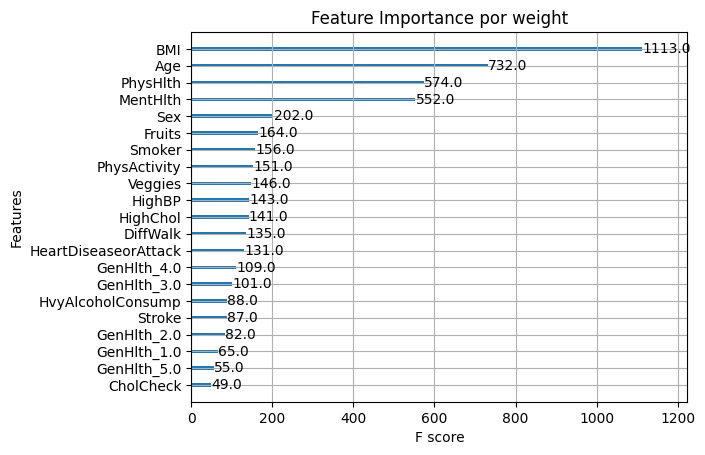

In [11]:
#1.
model = pipeline_xgb.named_steps['classifier']

# Se grafica la importancias de las features por 'weight'
plot_importance(model, importance_type = 'weight')
plt.title("Feature Importance por weight")
plt.show()

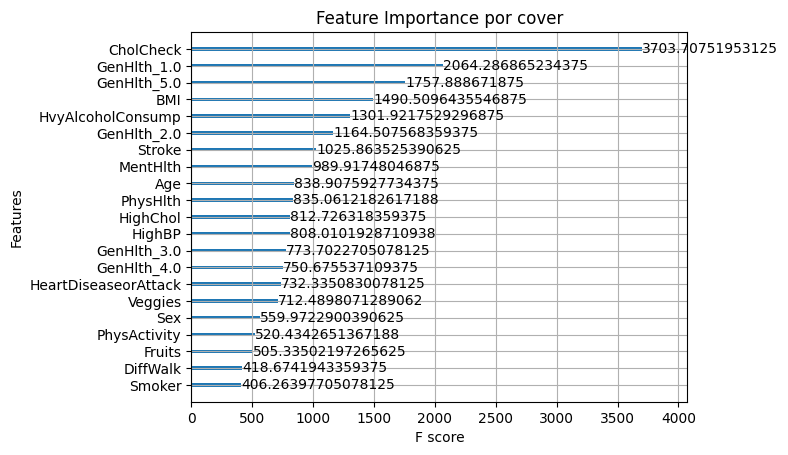

In [12]:
# Se grafica la importancias de las features por 'cover'
plot_importance(model, importance_type = 'cover')
plt.title("Feature Importance por cover")
plt.show()

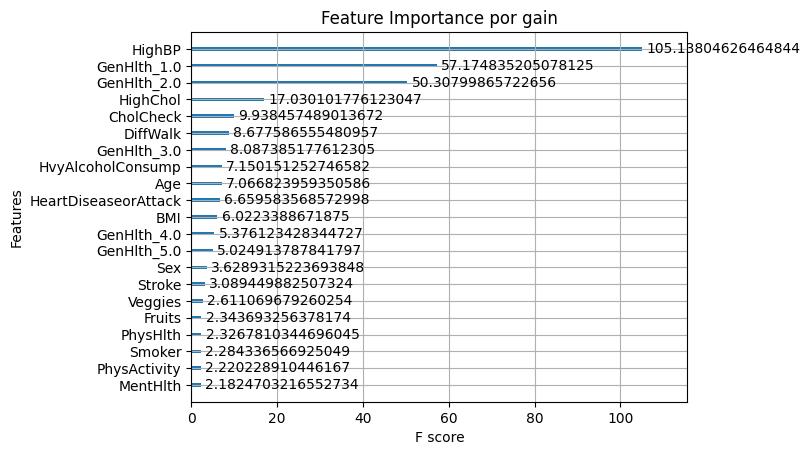

In [13]:
# Se grafica la importancias de las features por 'gain'
plot_importance(model, importance_type = 'gain')
plt.title("Feature Importance por gain")
plt.show()

### 2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.

Los resultados obtenidos no son completamente compatibles, ya que cada uno de estos métodos mide aspectos distintos y dependiendo de lo que se estime conveniente se puede seleccionar uno en vez del otro. De manera resumen se tiene que:



*   Weight mide cuántas veces se utiliza una característica para dividir los nodos a lo largo de los árboles.
*   Cover mide cuántas instancias o datos cubre una característica en las divisiones, reflejando su impacto en un número de observaciones.
* Gain mide la mejora promedio en la precisión o la reducción del error que proporciona una característica cuando se utiliza en las divisiones.

Dado que cada métrica tiene un enfoque distinto, es normal que se presenten resultados distintos. Es por esto que una característica que aparece frecuente en las divisiones (weight) no necesariamente tendrá un impacto significativo en la precisión (gain) o podría no cubrir muchas observaciones (cover).


### 3. ¿Las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?
Las métricas de importancia obtenidas no son suficientes para ofrecer una interpretabilidad completa del modelo de árboles. Si bien proporcionan una visión global, indicando las características en todo el conjunto de datos, no explica cómo una característica afecta la predicción para una instancia individual.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [14]:
# 1. Se implementa método de permutación
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline_xgb, X_test, y_test, n_repeats=30, random_state=42)

In [15]:
# 2. Repita el proceso 30 veces y verifique la desviación estándar de sus resultados

# Se ordenan los indices permutados
sorted_index = result.importances_mean.argsort()

# Obtenemos desviacion estandar y los nombres de los features
std = result.importances_std[sorted_index]
features_names = df.columns[sorted_index]

for i in range(len(features_names)):
    print(f"Desviación estandar de {features_names[i]} es {std[i]}")

Desviación estandar de Fruits es 0.0007738950412138285
Desviación estandar de PhysActivity es 0.0008501744083847459
Desviación estandar de Smoker es 0.0006666838867430935
Desviación estandar de Veggies es 0.0006932772124073901
Desviación estandar de Stroke es 0.00043698726186526527
Desviación estandar de Sex es 0.000850300796724778
Desviación estandar de PhysHlth es 0.000721918801628431
Desviación estandar de MentHlth es 0.0010218494955595166
Desviación estandar de DiffWalk es 0.0006710494068952242
Desviación estandar de HvyAlcoholConsump es 0.0005530270430552866
Desviación estandar de CholCheck es 0.0005541248247047775
Desviación estandar de HeartDiseaseorAttack es 0.0008269008604981729
Desviación estandar de HighChol es 0.0011805176310424215
Desviación estandar de HighBP es 0.0012099452444462057
Desviación estandar de Age es 0.0016053583022437358
Desviación estandar de BMI es 0.002374099299158912
Desviación estandar de GenHlth es 0.0023885955614349292


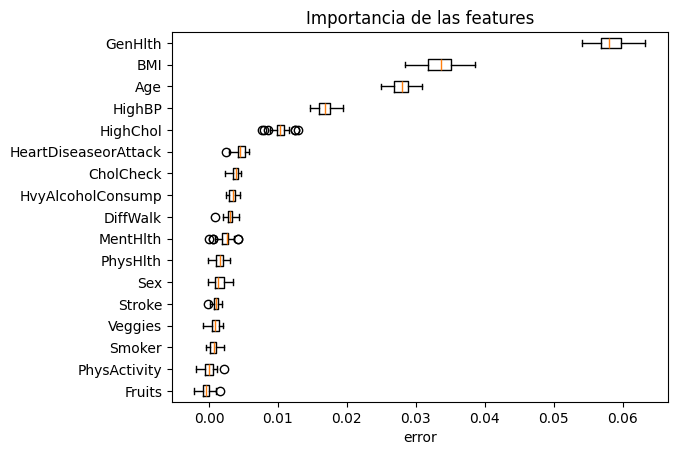

In [16]:
# 3. Visualice los resultados de este método en un gráfico.

plt.boxplot(
    result.importances[sorted_index].T,
    vert=False,
    labels=np.array(df.columns[sorted_index],
))

plt.title("Importancia de las features")
plt.xlabel('error')
plt.show()

4.

* ¿Cómo mide la importancia de las features su propuesta?

R: Se mide la importancia con el método de permutación, el cual consiste en evaluar la importancia de una cierta característica intercambiando sus valores de forma aleatoria, pero manteniendo las otras características sin modificar. De esta manera, se mide el impacto observando el rendimiento del modelo, si existe un cambio significativo, se infiere que la caracteristica es importante.

* ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?

R: Las features con mayor importancia corresponde a 'GenHlth', 'BMI', 'Age', 'HighBP' y 'HighChol', observando un error importante cuando estas se permutan, por lo que el modelo resulta sensible a ellas, lo cual tiene sentido ya que esas variables pueden tener una gran importancia en la predicción de la diabetes, factores como la edad son bastantes relevantes para este tipo de diagnostico.

* ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

R: Al observar las features importances anteriores, se puede ver que factores como la edad y BMI son caracteristicas comunes entre ambos casos. Por lo que no cambian de manera significativa las conclusiones.

* Nombre y explique 3 ventajas y 3 desventajas del método implementado.

R:
* Ventajas:
  - Buen método para problemas tales como la multicolinealidad debido a que analizan de manera individual las variables.
  - Ayuda a visualizar la importancia de una caracteristica frente al resto.
  - Es aplicable en variados modelos de Machine Learning.
* Desventajas:
  - Alto costo computacional
  - Sensibilidad frente a la cantidad de permutaciones que se realicen, mientras menos entonces la precision baja
  - Si las caracteristicas estan correlacionadas, entonces la importancia que entrega el modelo puede estar sesgada facilmente.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [21]:
!pip install shap

In [22]:
import warnings
import shap
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [23]:
# Se extrae el modelo XGBoost del pipeline
xgb_model = pipeline_xgb.named_steps['classifier']

# Se aplica el preprocesamiento del pipeline a los datos de prueba
X_test_transformed = pipeline_xgb.named_steps['preprocessor'].transform(X_test)

# Se crea el explainer de SHAP para XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(col_transformer.transform(X_test))
shap_values

array([[ 0.19845617, -0.6897166 ,  0.02529856, ..., -0.04565874,
        -0.01879826, -0.5806236 ],
       [ 0.60035735,  0.5303957 ,  0.03423166, ...,  0.17264232,
        -0.02556993, -0.54686534],
       [-0.15003309, -0.24606727,  0.00851034, ..., -0.11455556,
        -0.014761  ,  0.49668714],
       ...,
       [-1.2668341 ,  0.20223013,  0.01639004, ..., -0.07412165,
        -0.03009438, -0.4854071 ],
       [-0.26969263, -0.12355637, -0.06953486, ...,  0.22729978,
         0.00763162, -0.592343  ],
       [ 0.23118603,  0.49577355,  0.04384709, ..., -0.07642223,
         0.00360234,  0.34532207]], dtype=float32)

In [24]:
# Se grafican los SHAP values para el primer paciente
paciente = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[paciente], X_test_transformed.iloc[paciente])

2. ¿Qué representa cada número en su resultado?
Cada numero representa el impacto de cada *feature* en la predicción del modelo para una observación en específico, en este caso, un paciente. El SHAP value indica en qué medida cada característica empuja la predicción hacia un valor más alto o más bajo.

3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?
Sí, el signo de cada SHAP tiene un significado. Los valores positivos significa que ese *feature* está aumentando la probabilidad de que el modelo haga una predicción positiva. En cambio, un valor negativo indica que ese *feature* está disminuyendo la probabilidad de una predicción positiva.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

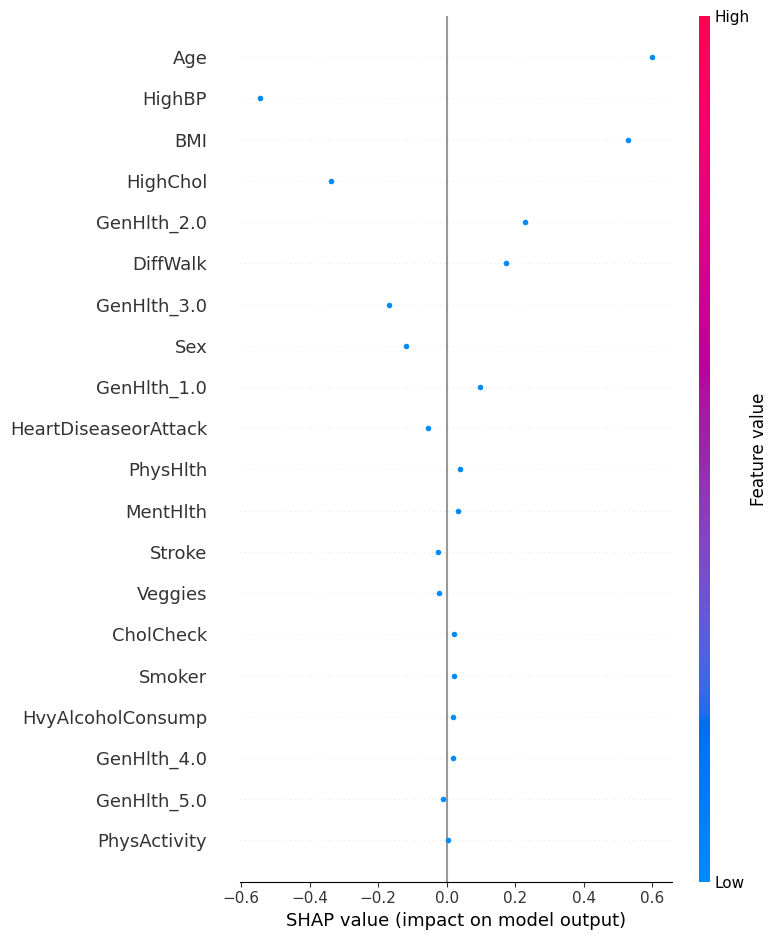

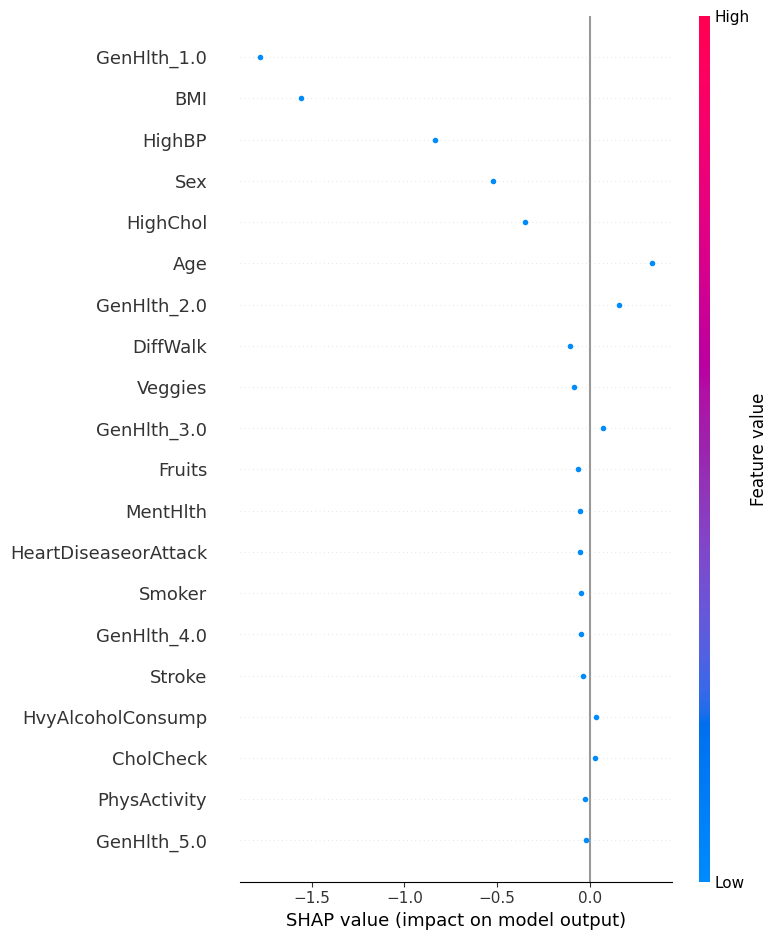

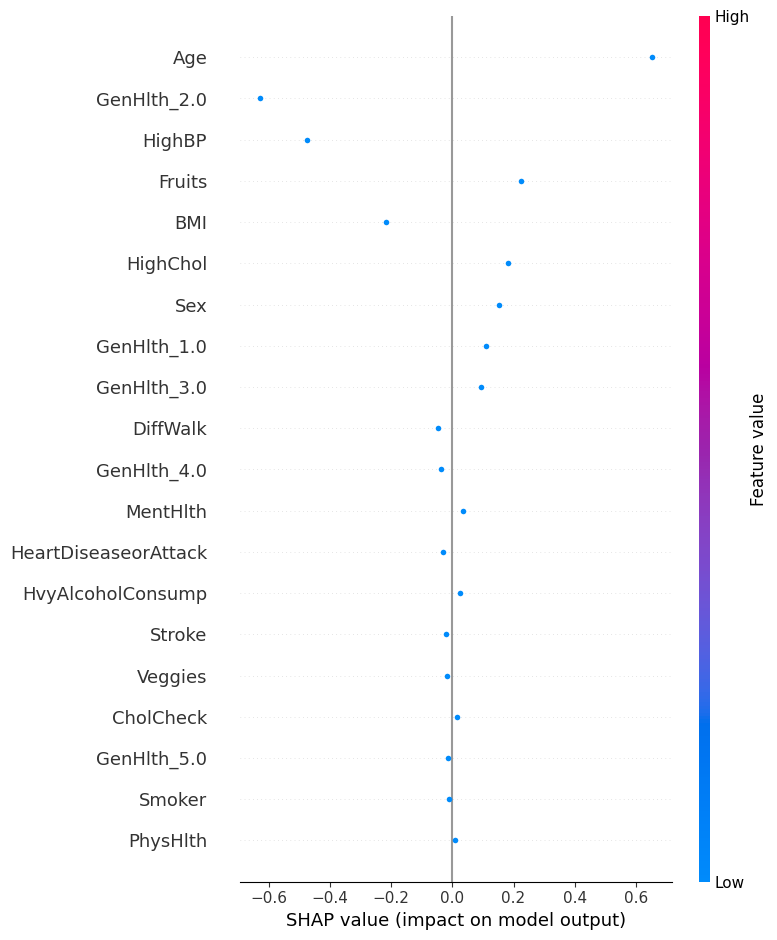

In [25]:
shap.summary_plot(shap_values[[1]], feature_names = X_test_transformed.columns, features = X_test_transformed[:1])
shap.summary_plot(shap_values[[9]], feature_names = X_test_transformed.columns, features = X_test_transformed[9:10])
shap.summary_plot(shap_values[[150]], feature_names = X_test_transformed.columns, features = X_test_transformed[150:151])

 - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
  - Para la instancia 1, vemos que Age y BMI afectan positivamente, mientras que HighBP y HighCol afectan negativamente.
  - Para la instancia 9, se observa que Age afecta positivamente, mientras que GenHIth_1.0 y BMI afectan negativamente.
  - Para la instancia 150, se observa que Age afecta positivamente, mientras que GenHIth_2.0 y HighBP afectan negativamente.


- ¿Existe algún patrón común entre las instancias analizadas?

Si bien no se presenta ningún patrón en particular entre las tres instancias analizadas, es posible observar que la edad afecta positivamente a los tres casos.

- ¿Es posible generalizar estas conclusiones a todo el dataset?
De las instancias analizadas no es posible generalizar estas conclusiones para el dataset completo, pues no todas las *features* importan de igual forma para cada paciente.


### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

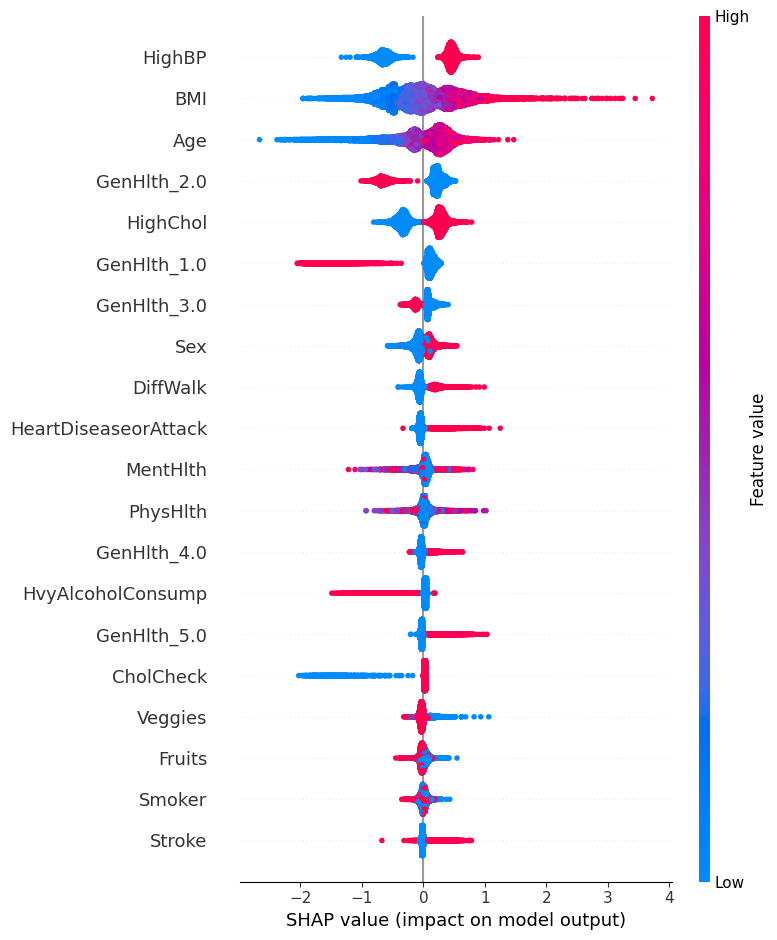

In [26]:
# Se visualiza el aporte global de cada feature
shap.summary_plot(shap_values, feature_names = X_test_transformed.columns, features = X_test_transformed)

- ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

Es posible notar que, tanto a nivel de instancia como a nivel global, las variables HighBP, BMI y Age son las más importantes. Por otro lado, se observa que la variable HvyAlcoholConsump tiene mayor impacto para ponderar negativamente a las predicciones de la diabetes, lo cual no fue observable a nivel de instancia.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

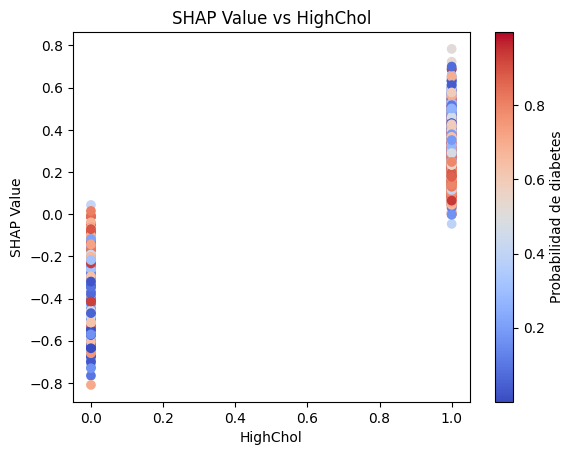

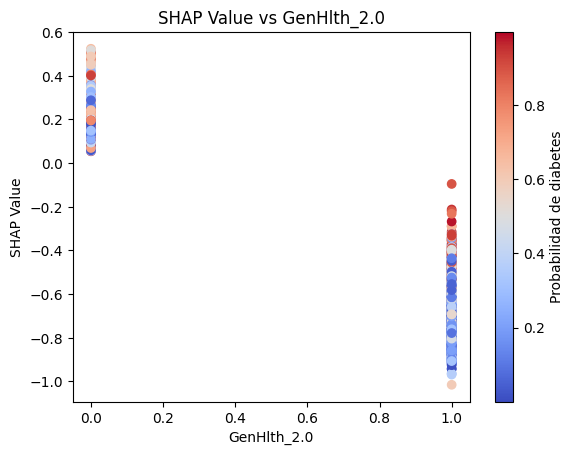

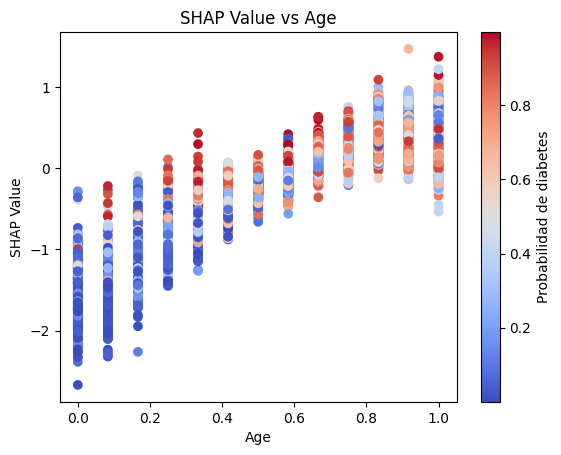

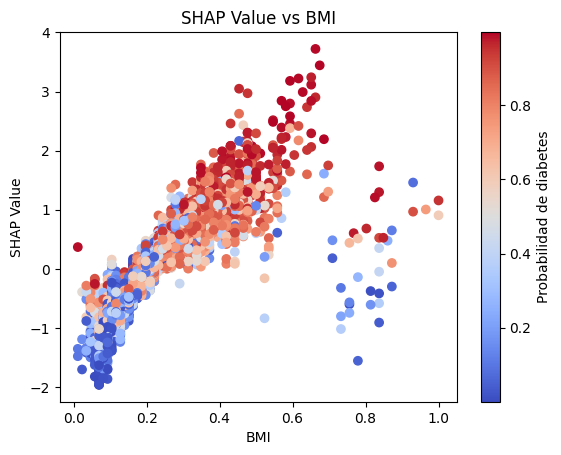

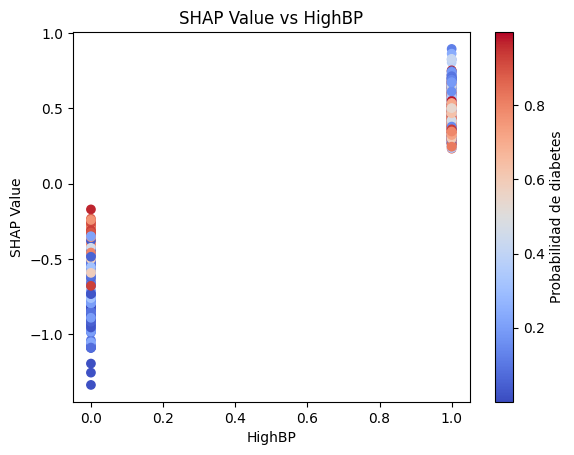

In [27]:
# Se seleccionan las 5 features con mayor impacto global
probas = pipeline_xgb.predict_proba(X_test)[:, 1]
top_features = np.argsort(np.abs(shap_values).mean(0))[-5:]

# Se grafica el scatter plot para cada feature
for feature_index in top_features:
    feature_name = X_test_transformed.columns[feature_index]

    plt.figure()
    plt.scatter(
        X_test_transformed.iloc[:, feature_index],
        shap_values[:, feature_index],
        c=probas,
        cmap='coolwarm',
    )
    plt.colorbar(label="Probabilidad de diabetes")
    plt.xlabel(feature_name)
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Value vs {feature_name}")
    plt.show()


- ¿Qué puede concluir de sus resultados?
  - Para HighCol, se observa que cuando el colesterol es alto los Shap Values también lo son, por lo que es posible concluir que el colesterol alto incrementa la probabilidad de tener diabetes, lo cual también es visible en la cantidad de marcas rojas presente en los valores altos de HighCol.

  - Para GenHlth, vemos que para un mayor valor de éste, disminuye el Sharp Value. Además, es posible observar que para valores mayores de GenHlth, se obtienen mas probabilidad de presentar diabetes, pues la cantidad de marcas rojas aumenta.

  - Para Age, vemos que hay una tendencia a aumentar el Shap Value a medida que aumenta la edad. Además, se observa que a medida que aumenta la edad también aumenta la probabilidad de tener diabetes.

  - Para BMI, se observa un un BMI más alto contribuye positivamente a la predicción de diabetes, pues al aumentar el BMI aumentan los valores SHAP. Por otro lado, también es posible visualizar que al aumentar el valor del BMI, la proporción de pacientes con probabilidad de diabetes aumenta.

  - Para HighBP es posible observar que cuando la presión es alta, los valores SHAP también lo son, lo cual nos indica que una presión alta incrementa la posibilidad de tener diabetes. Esto también se puede ver reflejado en la cantidad de puntos rojos que hay cuando se tiene un HighBP alto.


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

<Figure size 640x480 with 0 Axes>

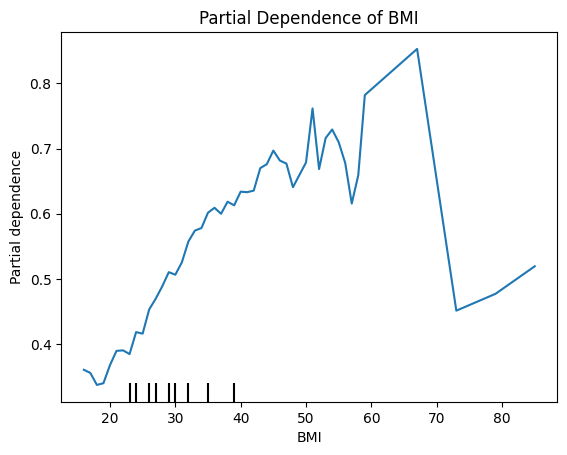

<Figure size 640x480 with 0 Axes>

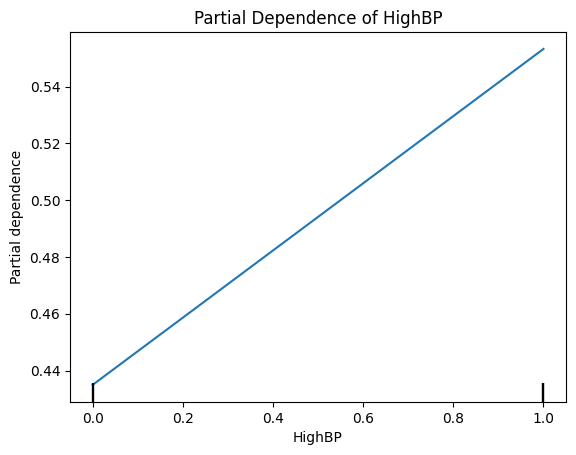

<Figure size 640x480 with 0 Axes>

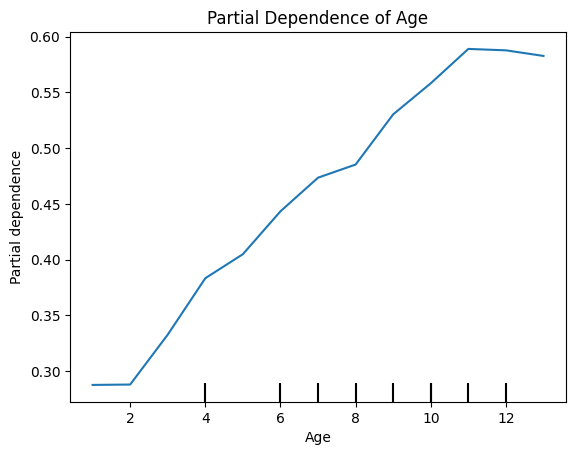

<Figure size 640x480 with 0 Axes>

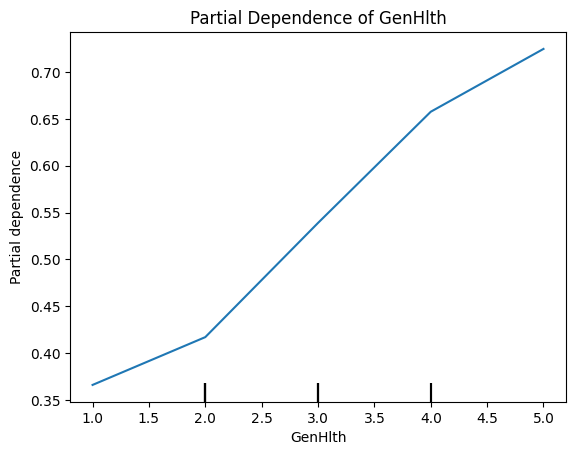

<Figure size 640x480 with 0 Axes>

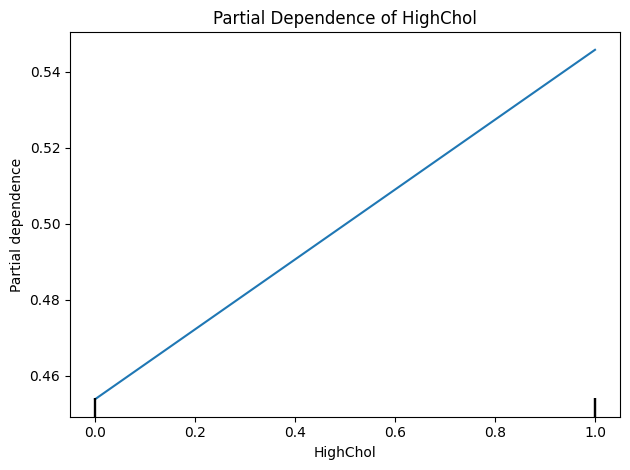

In [28]:
from sklearn.inspection import PartialDependenceDisplay

# Submuestra de 1000 observaciones
X_sample = X_test.sample(n=1000, random_state=42)

# features con mayor impacto
top_features = ['BMI', 'HighBP', 'Age', 'GenHlth', 'HighChol']

# generación de Partial Dependence Plots para cada característica
for i, feature in enumerate(top_features):
    plt.figure()
    PartialDependenceDisplay.from_estimator(pipeline_xgb, X_sample, features=[feature])
    plt.title(f'Partial Dependence of {feature}')

plt.tight_layout()
plt.show()

- ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

  - BMI: Vemos que hay un valor considerablemente ascendente hasta un BMI de 60, luego baja drásticamente cercano al valor 70 para finalmente recuperar un comportamiento ascendente en el valor 80. Estas variaciones pueden indicar que el impacto del BMI en la probabilidad de diabetes no es lineal y puede que esté afectado por otros factores.

  - HighBP: Observamos un comportamiento lineal con una pendiente positiva, indicando que la presión arterial alta está relacionado con un mayor porbabilidad de tener diabetes.

  - Age: Es posible observar un comportamiento aproximadamente lineal con pendiente positiva; sin embargo, en ambos extremos hay un comportamiento constante. De todas formas, es posible concluir que existe una relación entre la edad y la probabilidad de diabetes, pues ambas van en aumento al mismo tiempo.

  - GenHlth: Nuevamente se observa un comportamiento aproximadamente lineal con pendiente positiva. Se concluye entonces que para valores altores de GenHlth hay una mayor probabilidad de diabetes.

  - HighChol: Se observa una comportamiento completamente lineal con pendiente positiva. Esto demuestra que valores altos de colesterol se asocian con una mayor probabilidad de diabetes.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [30]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [31]:
from alibi.explainers import AnchorTabular

In [37]:
explainer = AnchorTabular(model.predict, feature_names = col_transformer.transform(X_train).columns)

# Se transforma X_test y se realiza fit al explainer
X_train_transformed = col_transformer.transform(X_train)
explainer.fit(X_train_transformed.values)

idx = 1000
X_select = col_transformer.transform(X_test[idx:idx+1])
explanation = explainer.explain(X_select.values)
print(f'Observación {idx}')
print('Predicción: ', 'Diabetes' if y_test[idx:idx+1].values == 1 else 'No Diabetes')
print('Anchor: %s' % (' & '.join(explanation.anchor)))
print('Precisión: ', explanation.precision)
print('Cobertura: ', explanation.coverage)
print('\n')

idx = 3001
X_select = col_transformer.transform(X_test[idx:idx+1])
explanation = explainer.explain(X_select.values)
print(f'Observación {idx}')
print('Predicción: ', 'Diabetes' if y_test[idx:idx+1].values == 1 else 'No Diabetes')
print('Anchor: %s' % (' & '.join(explanation.anchor)))
print('Precisión: ', explanation.precision)
print('Cobertura: ', explanation.coverage)
print('\n')

idx = 5751
X_select = col_transformer.transform(X_test[idx:idx+1])
explanation = explainer.explain(X_select.values)
print(f'Observación {idx}')
print('Predicción: ', 'Diabetes' if y_test[idx:idx+1].values == 1 else 'No Diabetes')
print('Anchor: %s' % (' & '.join(explanation.anchor)))
print('Precisión: ', explanation.precision)
print('Cobertura: ', explanation.coverage)

Observación 1000
Predicción:  Diabetes
Anchor: Age > 0.83 & HeartDiseaseorAttack > 0.00 & BMI > 0.15
Precisión:  0.9517133956386293
Cobertura:  0.0297


Observación 3001
Predicción:  Diabetes
Anchor: BMI > 0.24 & HighBP > 0.00 & GenHlth_2.0 <= 0.00
Precisión:  0.9568480300187617
Cobertura:  0.1503


Observación 5751
Predicción:  Diabetes
Anchor: BMI <= 0.15 & HighBP <= 0.00 & GenHlth_2.0 > 0.00
Precisión:  0.9923312883435583
Cobertura:  0.0613


 ¿Tienen sentido sus reglas propuestas para las observaciones?

 De los resultados obtenidos, se puede observar que:


*   Para la observación 1000 se cubre un 3% de la población con un 95% de precisión, lo cual es señalado por la edad, BMI y HeartDiseaseorAttack.
*   Para la observación 3001 se cubre un 15% de la población con un 95% de precisión, donde las reglas corresponden a BMI, HighBP y GenHlth.
*   Para la observación 5751 se cubre un 6% y se tiene precisión de 99%, donde las reglas son las mismas que la anterior.

Para todas las predicciones se tiene Diabetes, y se puede observar que tiene sentido, especialmente considerando que estas features resultan bastante relevantes en la predicción según los datos anteriores.



# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Los métodos que se utilizaron en este laboratorio fueron dos: globales y locales. Al analizar los resultados obtenidos en cada caso, se concluye que ambos casos entregan buenas conclusiones, teniendo una diferencia significativa en el tiempo de trabajo, ya que los métodos globales requieren menos tiempo que los métodos locales.

Por otro lado, los métodos locales permiten tener un analisis más profundo, por lo que esto podria indicar una mayor tendencia a utilizar este tipo de métodos para esta tarea de clasificación, por lo que se concluye que para el problema del doctor Simi podria funcionar mejor un método local.



# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>